In [5]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sn

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.optimizers import Adam
from keras.layers import BatchNormalization
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, LeakyReLU, Flatten, Dense, Activation, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix


In [6]:

from keras.datasets import mnist, cifar10

np.random.seed(1)


# CNN Architecture

Define and train a CNN model with different network setups, such as: 
- performs convolution
- performs 2D max pooling
- changing activation function from ReLU to LeakyReLU
- adding dropout; etc. 

*Hidden Layer Components*

1. Convolution
2. Activation
3. Pooling

- Repeat Steps 1,2,3 to add more hidden layers
- Fully connect the network to give the CNN the ability to classify the samples

In [29]:

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# Fully connected layer

BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10))

# model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

model.summary()


c:\Users\camer\AppData\Local\Programs\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 594,922 (2.27 MB)

 Trainable params: 594,922 (2.27 MB)

 Non-trainable params: 0 (0.00 B)

# Test with MNIST Dataset


Train samples: (60000, 28, 28, 1); (60000,) 
Test samples: (10000, 28, 28, 1); (10000,)


(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]))

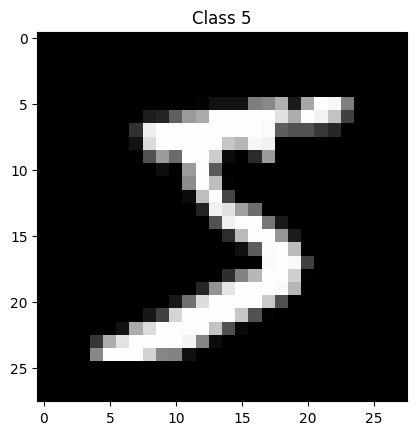

In [28]:

NUM_CLASSES = 10
(X_train, y_train), (X_test, y_test) = mnist.load_data()

d = X_train.shape[-1]

X_train = X_train.reshape(X_train.shape[0], d, d, 1)
X_test = X_test.reshape(X_test.shape[0], d, d, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train/=255
X_test/=255

Y_train = to_categorical(y_train, NUM_CLASSES)
Y_test = to_categorical(y_test, NUM_CLASSES)

print(f"\nTrain samples: {X_train.shape}; {y_train.shape}",
      f"\nTest samples: {X_test.shape}; {y_test.shape}"
      )

plt.imshow(X_train[0], cmap='gray')
plt.title('Class '+ str(y_train[0]))

y_train[0], Y_train[0]


In [30]:

adjust = 0.08
gen = ImageDataGenerator(rotation_range=8, 
                         width_shift_range=adjust, 
                         shear_range=0.3,
                         height_shift_range=adjust, 
                         zoom_range=adjust
                        )
test_gen = ImageDataGenerator()

train_generator = gen.flow(X_train, Y_train, batch_size=64)
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)


In [33]:

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.fit(train_generator, 
          steps_per_epoch=X_train.shape[0]//64, 
          epochs=5, 
          validation_data=test_generator, 
          validation_steps=X_test.shape[0]//64
          )

# model.fit(X_train, Y_train, 
#           batch_size=128, 
#           epochs=5, 
#           validation_data=(X_test, Y_test)
#           )

score = model.evaluate(X_test, Y_test)
print(f'\nTest accuracy: {score[1]}')


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.9937 - loss: 0.0191 - val_accuracy: 0.9948 - val_loss: 0.0169
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9964 - loss: 0.0108 - val_accuracy: 0.9956 - val_loss: 0.0132
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9974 - loss: 0.0080 - val_accuracy: 0.9919 - val_loss: 0.0254
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.9975 - loss: 0.0076 - val_accuracy: 0.9948 - val_loss: 0.0164
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9975 - loss: 0.0082 - val_accuracy: 0.9933 - val_loss: 0.0202
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9910 - loss: 0.0258

Test accuracy: 0.9933000206947327


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


<Axes: >

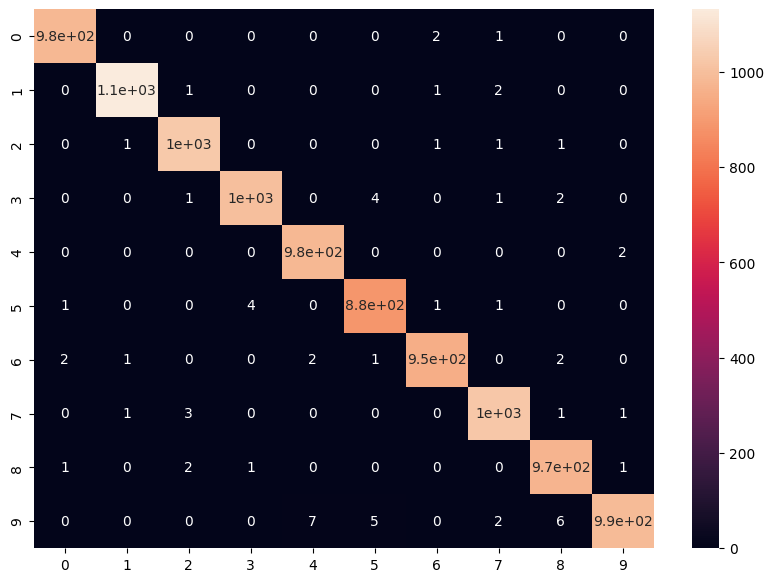

In [34]:

prediction = np.argmax(model.predict(X_test), axis=-1)
actual = list(y_test)

sub = pd.DataFrame({'Actual': actual, 'Predictions': prediction})
# sub.to_csv('./output_cnn.csv', index=False)

#print confusion matrix
label_set = list(range(NUM_CLASSES))
cm = confusion_matrix(actual, prediction)
df_cm = pd.DataFrame(cm, 
                    index = [i for i in label_set],
                    columns = [i for i in label_set]
                    )

plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)


# Test with CIFAR-10 Dataset

- 32x32 colour images from 10 classes


Train samples: (50000, 32, 32, 3); (50000, 1) 
Test samples: (10000, 32, 32, 3); (10000, 1)


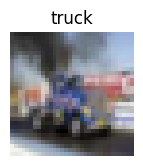

In [15]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(f"\nTrain samples: {x_train.shape}; {y_train.shape}",
      f"\nTest samples: {x_test.shape}; {y_test.shape}"
      )

cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer",  
                    "dog", "frog", "horse", "ship", "truck"]

rows, cols = 2, 8
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))

# show random train image 
for i in range(cols):
  for j in range(rows):
    ax = fig.add_subplot(rows, cols, i * rows + j + 1)
    ax.axis('off')

    random_index = np.random.randint(0, len(y_train))
    ax.imshow(x_train[random_index, :])
    ax.set_title(cifar10_classes[y_train[random_index, 0]])
    
    plt.show()
    

#### Base Model

In [16]:

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# Fully connected layer

BatchNormalization()
model.add(Dense(512,activation=('relu')))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10,activation=('softmax')))

model.summary()


c:\Users\camer\AppData\Local\Programs\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 202,282 (790.16 KB)

 Trainable params: 202,282 (790.16 KB)

 Non-trainable params: 0 (0.00 B)

#### dropout per layer

In [46]:

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
# Fully connected layer

BatchNormalization()
model.add(Dense(512,activation=('relu')))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10,activation=('softmax')))

model.summary()


#### global avg pooling for final layer

In [54]:

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3), activation='relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(LeakyReLU(alpha=0.1))

# Fully connected layer
model.add(GlobalAveragePooling2D())

BatchNormalization()
model.add(Dense(512,activation=('relu')))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10))

model.add(Activation('softmax'))

model.summary()


#### leaky ReLu activation

In [62]:


model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3)))
model.add(LeakyReLU(alpha=0.1))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# Fully connected layer

BatchNormalization()
model.add(Dense(512))
model.add(LeakyReLU(alpha=0.1))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10))

model.add(Activation('softmax'))

model.summary()


#### Leaky ReLu, more dense layers and dropout

In [71]:

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3)))
model.add(LeakyReLU(alpha=0.1))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
model.add(LeakyReLU(alpha=0.1))

# Fully connected layer
model.add(GlobalAveragePooling2D())

BatchNormalization()
model.add(Dense(128, activation=LeakyReLU(alpha=0.2)))
BatchNormalization()
model.add(Dense(64, activation=LeakyReLU(alpha=0.2)))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(32, activation=LeakyReLU(alpha=0.2)))
BatchNormalization()
model.add(Dense(16, activation=LeakyReLU(alpha=0.2)))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10,activation=('softmax')))

model.summary()


## complile model and fit data

In [17]:

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=Adam(), 
              metrics=['accuracy']
              )
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {score[1]}')


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.3075 - loss: 2.0935 - val_accuracy: 0.5316 - val_loss: 1.3239
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.5417 - loss: 1.2902 - val_accuracy: 0.5834 - val_loss: 1.1850
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6073 - loss: 1.1138 - val_accuracy: 0.6421 - val_loss: 1.0243
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6537 - loss: 0.9985 - val_accuracy: 0.6424 - val_loss: 1.0292
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6735 - loss: 0.9291 - val_accuracy: 0.6002 - val_loss: 1.1655
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5980 - loss: 1.1626

Test accuracy: 0.6001999974250793


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


<Axes: >

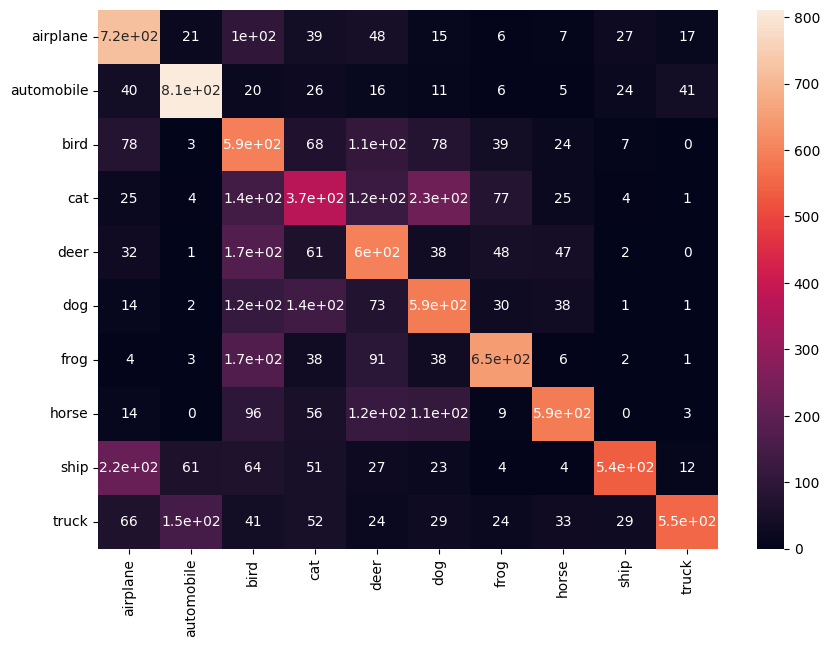

In [18]:

y_pred = model.predict(x_test)

predictions = np.argmax(y_pred, axis=-1)
actuals = list(y_test)

sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})

#print confusion matrix
cm=confusion_matrix(actuals,predictions)
df_cm = pd.DataFrame(cm, 
                    index = [i for i in cifar10_classes],
                    columns = [i for i in cifar10_classes]
                    )
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
